## Dimensionality Reduction Using PCA

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


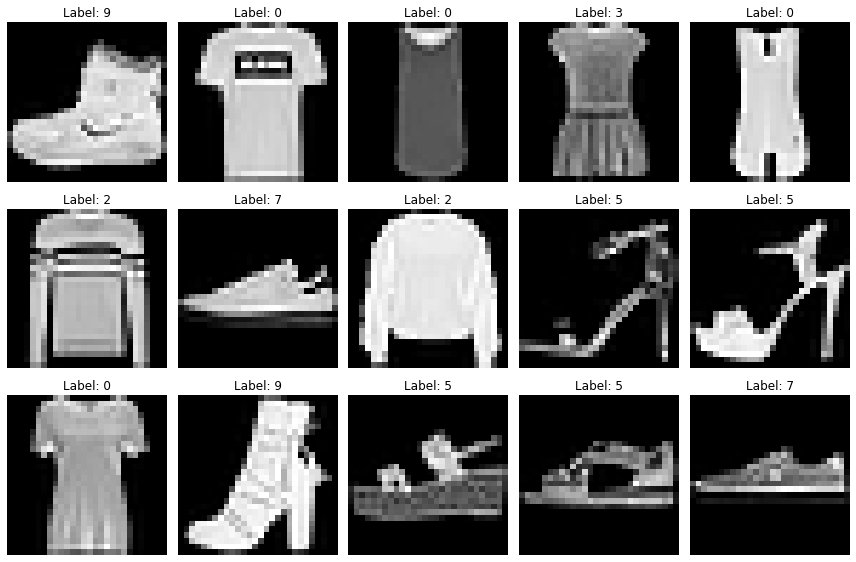

In [2]:
# Displaying the head of the dataset
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f'Label: {y_train[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [3]:
# Flattening the images
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Normalizing the data
x_train_flat = x_train_flat.astype('float32') / 255.0
x_test_flat = x_test_flat.astype('float32') / 255.0

In [4]:
# Reshaping the data into the format sutable for DataFrame
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Performing PCA for dimensionality reduction
pca = PCA(n_components=50)  
x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)


In [5]:
# Creating DataFrame for train and test data
train = pd.DataFrame(x_train_pca)
train['label'] = y_train

test = pd.DataFrame(x_test_pca)
test['label'] = y_test

# Print shapes of the datasets
print("Train DataFrame shape:", train.shape)
print("Test DataFrame shape:", test.shape)


Train DataFrame shape: (60000, 51)
Test DataFrame shape: (10000, 51)


In [6]:
# Displaying the first few rows of train DataFrame
print(train.head())


             0            1            2           3           4            5  \
0  -123.993791  1633.074396 -1211.041191  240.793118   -3.348351  -404.340455   
1  1407.928853  -451.641336  -261.027034  366.436695  215.437558  1269.183187   
2  -725.910795 -1101.838138   106.154242  210.031701 -105.123019   -53.417242   
3    31.398664  -981.067672   202.580930  378.274376   16.283660   184.904390   
4   804.119258 -1201.168720  -744.377121 -269.630116  404.982684  -150.401060   

            6           7           8           9  ...          41  \
0  -91.505515  201.375258  -32.915775  -29.809372  ...  -90.689523   
1 -148.350092 -224.292458 -115.631094 -229.845296  ...   78.567670   
2   -2.085852   51.304638  -91.181274  -83.071415  ...  125.681715   
3 -112.847785   15.280460 -344.278933   69.950294  ...  -76.392903   
4  230.429128  141.440010   14.652711 -164.896824  ...   66.196606   

           42          43         44          45          46         47  \
0   74.993833  -9

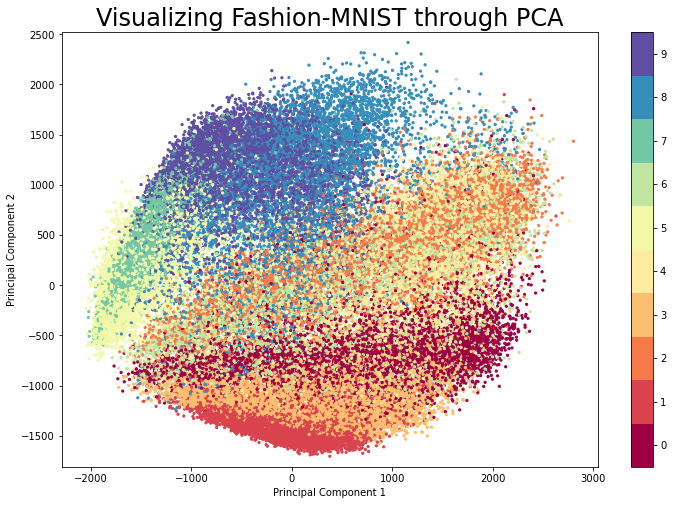

In [7]:
# Plot the first two principal components of each point to learn about the data
plt.figure(figsize=(12, 8))
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], s=5, c=y_train, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Fashion-MNIST through PCA', fontsize=24)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [8]:
# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')

# Training the SVM classifier
svm_classifier.fit(x_train_pca, y_train)

# Predict on the test data
y_pred = svm_classifier.predict(x_test_pca)


In [10]:
# Evaluate the performance
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.99      0.96      0.97      1000
           2       0.78      0.78      0.78      1000
           3       0.87      0.89      0.88      1000
           4       0.79      0.80      0.80      1000
           5       0.97      0.94      0.95      1000
           6       0.69      0.65      0.67      1000
           7       0.92      0.94      0.93      1000
           8       0.97      0.97      0.97      1000
           9       0.94      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



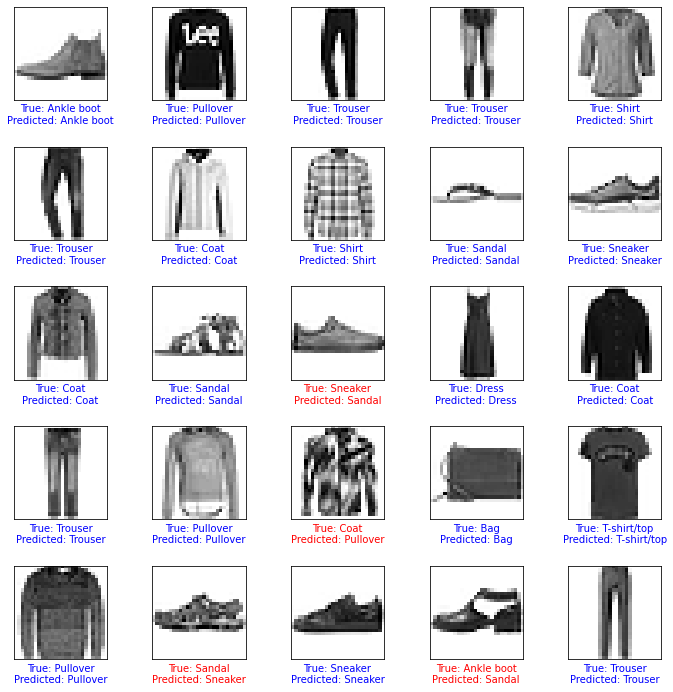

In [11]:
# Display a few sample images along with predicted labels and true labels
plt.figure(figsize=(12, 12))  
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)  
    predicted_label = y_pred[i]
    true_label = y_test[i]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"True: {class_names[true_label]}\nPredicted: {class_names[predicted_label]}", color=color)
plt.subplots_adjust(hspace=0.5)  
plt.show()